# `openCV`
- open source computer vision library
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서, 이미지를 숫자 배열 데이터로 변경

### `!pip install opencv-python` : install library
- COLAB에는 설치되어 있음

In [7]:
!pip install opencv-python

In [0]:
import urllib.request as req
import cv2

In [23]:
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'test.png')

('test.png', <http.client.HTTPMessage at 0x7f4e37b26390>)

## read img by openCV

In [24]:
%time img = cv2.imread('test.png')
%time print (img)
print (type(img), len(img))

CPU times: user 4.28 ms, sys: 38 µs, total: 4.32 ms
Wall time: 7.06 ms
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
CPU times: user 677 µs, sys: 0 ns, total: 677 µs
Wall time: 692 µs
<class 'numpy.ndarray'> 550


CPU times: user 21.8 ms, sys: 1.18 ms, total: 23 ms
Wall time: 27.5 ms


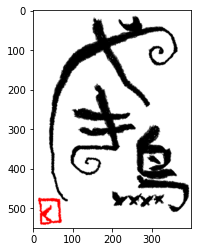

CPU times: user 128 ms, sys: 1.03 ms, total: 129 ms
Wall time: 129 ms


In [25]:
%time plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
%time plt.show()
plt.close()

In [27]:
import matplotlib.pyplot as plt

filepath = 'girl.jpg'
img = cv2.imread(filepath)
cv2.imwrite('out.png', img)

True

OpenCV에서 BGR 순 - matplotlib에서 RGB 순

CPU times: user 35.7 ms, sys: 3.89 ms, total: 39.6 ms
Wall time: 41.2 ms


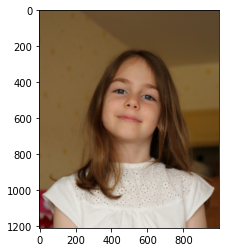

CPU times: user 240 ms, sys: 6.99 ms, total: 247 ms
Wall time: 249 ms


In [39]:
# plt.axis('off')
%time plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
%time plt.show()
plt.close()

In [0]:
img = cv2.imread('out.png')

resizing

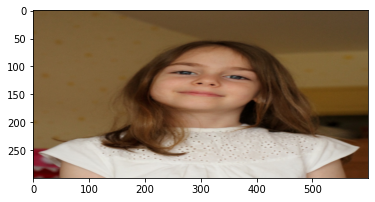

In [30]:
im2 = cv2.resize(img, (600,300))
cv2.imwrite('out-resize.png', im2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

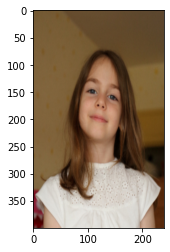

In [31]:
im3 = cv2.resize(im2, (240, 400))
cv2.imwrite('out-resize2.png', im3)
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

In [34]:
print (type(im3), len(img),len(im2),len(im3))

<class 'numpy.ndarray'> 1209 300 400


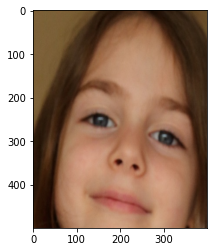

In [46]:
img = cv2.imread('out.png')
im2 = img[250:650, 300:700]
# plt.imshow(im2)
# plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
im2 = cv2.resize(im2, (400, 500))
cv2.imwrite('cut-resize.png', im2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

## haarcascades file 지정해서 검출기 생성

- openCV는 haar-like 특징 학습기라 부르는 머신러닝을 사용해 얼굴 인식
- cascade file (얼굴요소 DB)를 사용해 눈-코-입과 같은 요소의 위치 관계 확인, 얼굴인지 확인
    - 정면, 웃는얼굴, 눈, 몸, 전체 등 다양한 cascade files
- [github > haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)

### 얼굴 검출 활용 - 자동 모자이크 처리
- 사생활 보호 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리

In [0]:
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

In [48]:
filepath = 'girl.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print (img_gray)

[[92 93 93 ... 75 75 75]
 [93 93 93 ... 72 73 74]
 [94 92 92 ... 73 75 76]
 ...
 [45 44 44 ... 52 53 54]
 [44 46 48 ... 51 52 53]
 [46 48 48 ... 50 52 54]]


In [49]:
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0 : print ('얼굴 인식 실패'); quit()
for (x,y,w,h) in face_list :
    print (f'얼굴의 좌표 = {x},  {y},  {w},  {h}')
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

얼굴의 좌표 = 319,  308,  405,  405


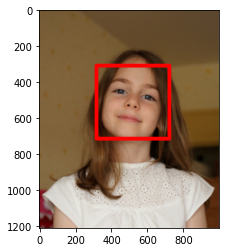

In [50]:
cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

In [0]:
def mosaic(img, rect, size) : 
    (x1, y1, x2, y2) = rect
    w = x2-x1
    h = y2-y1
    i_rect = img[y1:y2, x1:x2]
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

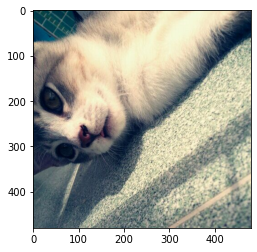

In [57]:
img = cv2.imread('cat.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

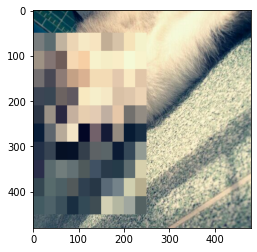

In [63]:
mos = mosaic(img, (0,50,250,450), 10)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

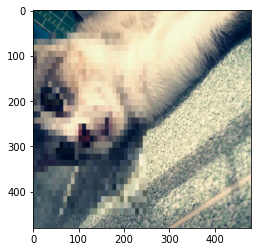

In [64]:
mos = mosaic(img, (0,50,250,450), 30)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

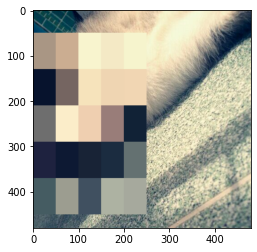

In [66]:
mos = mosaic(img, (0,50,250,450), 5)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

### 사람 얼굴에 자동으로 모자이크 처리

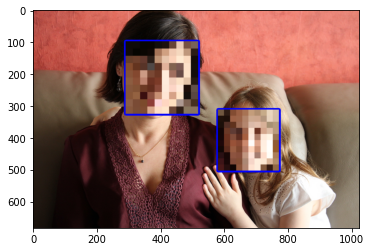

In [80]:
img = cv2.imread('family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0 : quit()
for (x,y,w,h,) in face_list : 
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), thickness=10)
    img = mosaic(img, (x,y,x+w,y+h), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

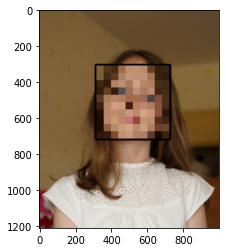

In [75]:
img = cv2.imread('out.png')
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_list = cascade.detectMultiScale(img, minSize=(150,150))
if len(face_list) == 0 : quit()
for (x,y,w,h,) in face_list : 
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), thickness=20)
    img = mosaic(img, (x,y,x+w,y+h), 10)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show(); plt.close()

## `openCV`의 얼굴 검출은 옆모습 & 기울어진 얼굴 검출력 떨어짐

---0---
face : 319  308  405  405
---10---
face : 394  385  409  409
---20---
face : 451  444  408  408
---30---
face : 494  483  409  409
---40---
---50---
---60---
---70---
---80---


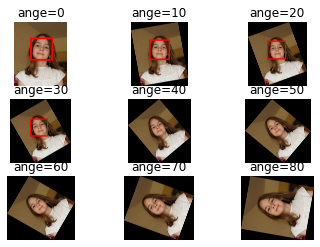

In [77]:
from scipy import ndimage

img = cv2.imread('girl.jpg')

def face_detect (img) :
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    for (x,y,w,h) in face_list :
        print (f'face : {x}  {y}  {w}  {h}')
        red = (0,0,255)
        cv2.rectangle(img, (x,y), (x+w,y+h), red, thickness=30)

for i in range(0, 9) : 
    ang = i*10
    print ('---' + str(ang) + '---')
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title(f'ange={str(ang)}')
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()
plt.close()